In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set_style('white')  # plot formatting
import scipy
from IPython.display import display 

# Reading and Processing Data Sets

In [2]:
HTRU2 = pd.read_csv('./Data/HTRU2/HTRU_2.csv', header=None)

In [3]:
display(HTRU2)
HTRU2[8].value_counts() 

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


0    16259
1     1639
Name: 8, dtype: int64

In [4]:
# Drop date column as it has to relevance to the prediction task

Occupancy1 = pd.read_csv('./Data/occupancy_data/datatest.txt', sep=",")
Occupancy2 = pd.read_csv('./Data/occupancy_data/datatest2.txt', sep=",")
Occupancy3 = pd.read_csv('./Data/occupancy_data/datatraining.txt', sep=",")
OccupancyData = pd.concat([Occupancy1,Occupancy2,Occupancy3])
OccupancyData = OccupancyData.drop(columns = ['date'])

In [5]:
display(OccupancyData)
OccupancyData['Occupancy'].value_counts() 

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.7000,26.2720,585.200000,749.200000,0.004764,1
141,23.7180,26.2900,578.400000,760.400000,0.004773,1
142,23.7300,26.2300,572.666667,769.666667,0.004765,1
143,23.7225,26.1250,493.750000,774.750000,0.004744,1
144,23.7540,26.2000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
8139,21.0500,36.0975,433.000000,787.250000,0.005579,1
8140,21.0500,35.9950,433.000000,789.500000,0.005563,1
8141,21.1000,36.0950,433.000000,798.500000,0.005596,1
8142,21.1000,36.2600,433.000000,820.333333,0.005621,1


0    15810
1     4750
Name: Occupancy, dtype: int64

In [6]:
# convert string column to a binary column

ElectricGridData = pd.read_csv('./Data/Data_for_UCI_named.csv')
ElectricGridData['stability'] = (ElectricGridData['stabf'] == 'stable').astype(int)
ElectricGridData = ElectricGridData.drop(columns = ['stab', 'stabf'])

In [7]:
display(ElectricGridData)
ElectricGridData['stability'].value_counts() 

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stability
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,1
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,1
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0


0    6380
1    3620
Name: stability, dtype: int64

In [8]:
CreditDefaultData = pd.read_excel('./Data/default of credit card clients.xls', index_col = 0, header = 1)

In [9]:
display(CreditDefaultData)
CreditDefaultData['default payment next month'].value_counts() 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


0    23364
1     6636
Name: default payment next month, dtype: int64

In [10]:
DatasetList = [HTRU2, OccupancyData, ElectricGridData, CreditDefaultData]
DatasetNames = ["HTRU2","OccupancyData","ElectricGridData","CreditDefaultData"]

In [11]:
Algorithms = ['Logistic Regression', 'Decision trees','ANN']

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Running Logistic Regression on DataSets

Starting Dataset #0


/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

DataSet HTRU2
[[0.97705071 0.86129335 0.89679879]
 [0.97743836 0.87186262 0.90724044]
 [0.97914405 0.87744875 0.90889521]
 [0.9787564  0.87442713 0.90369693]
 [0.97689564 0.86743772 0.90107127]]


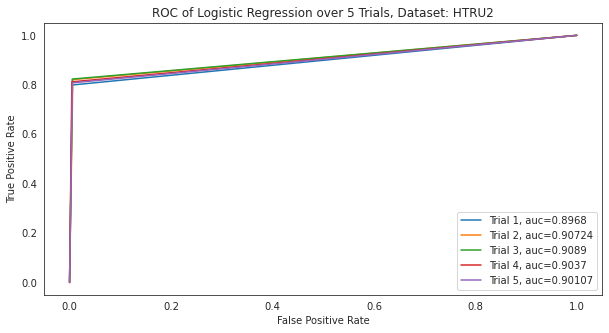

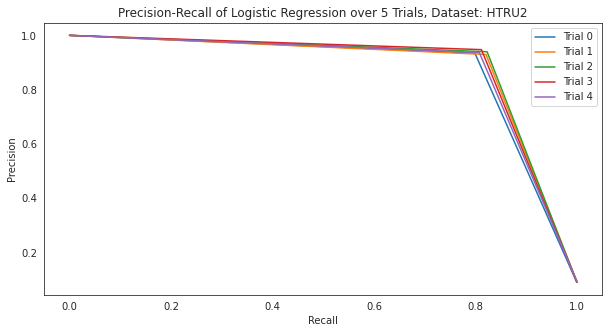

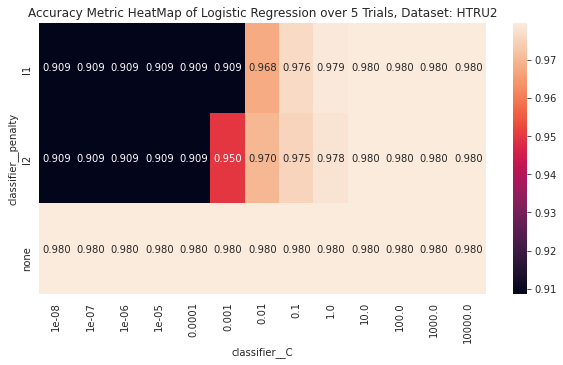

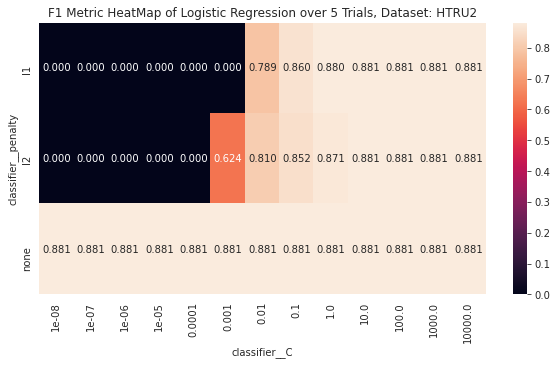

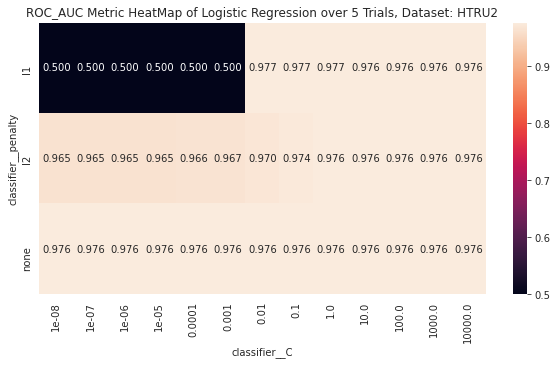

Starting Dataset #1


/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

DataSet OccupancyData
[[0.98881748 0.9760989  0.99077761]
 [0.98894602 0.97647059 0.9910598 ]
 [0.98868895 0.97605442 0.99079866]
 [0.98888175 0.97628513 0.99082131]
 [0.98856041 0.97586768 0.99081327]]


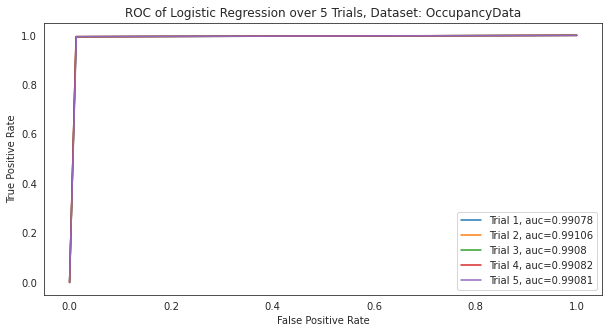

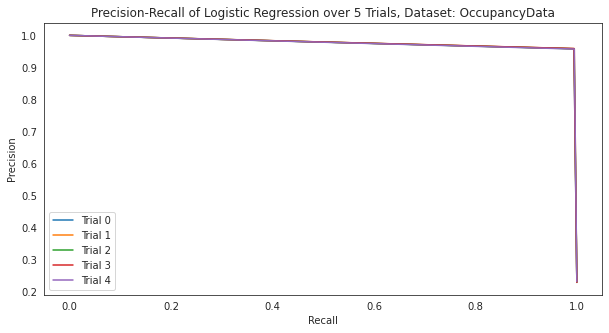

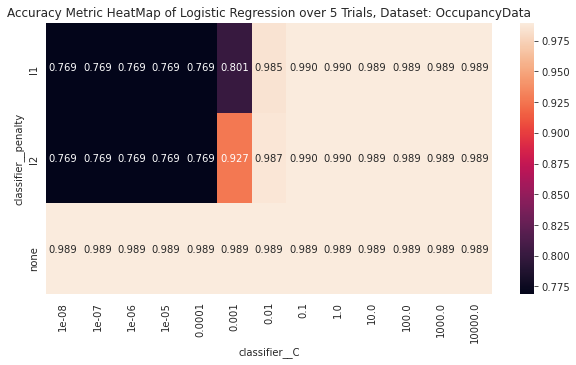

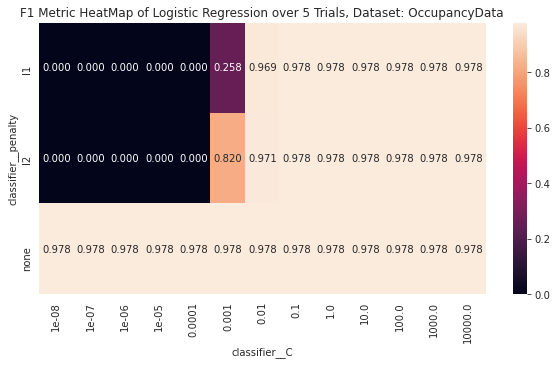

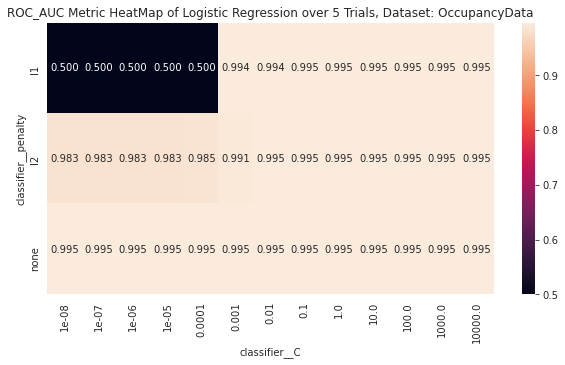

Starting Dataset #2


/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

DataSet ElectricGridData
[[0.8166     0.7336625  0.78860039]
 [0.8178     0.73323572 0.79179548]
 [0.8162     0.73765344 0.79329705]
 [0.8116     0.72868664 0.78852304]
 [0.8158     0.7366314  0.79393417]]


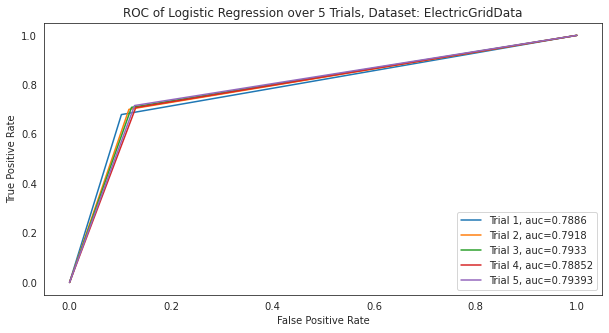

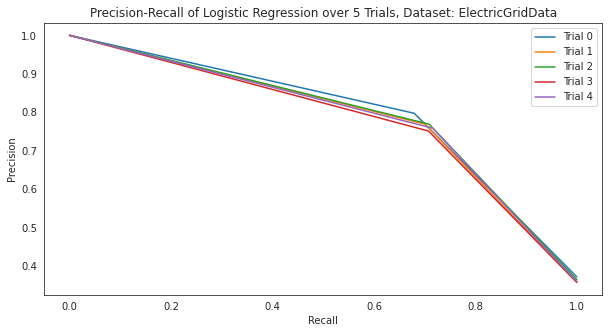

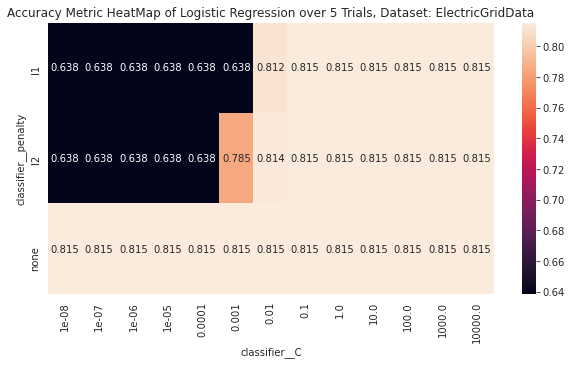

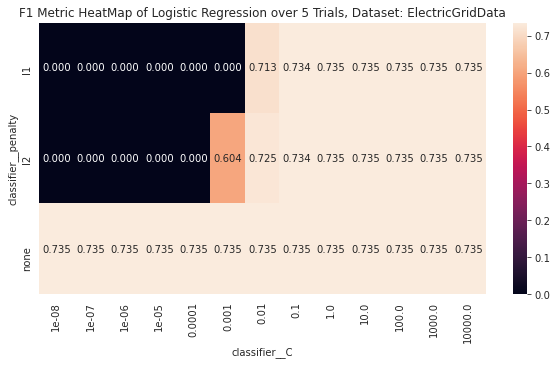

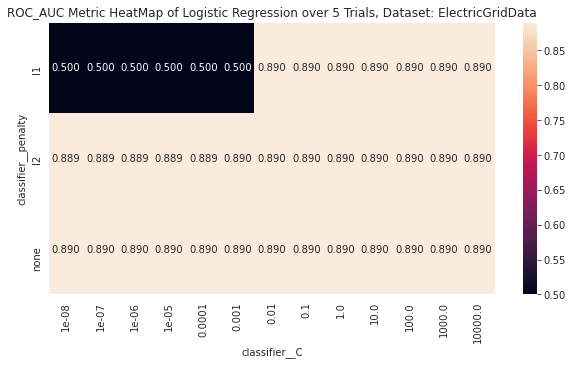

Starting Dataset #3


/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

DataSet CreditDefaultData
[[0.8094     0.35928466 0.60613208]
 [0.81324    0.3951289  0.62083804]
 [0.81468    0.38660135 0.61751732]
 [0.81132    0.37958701 0.61429018]
 [0.81096    0.37154255 0.61105473]]


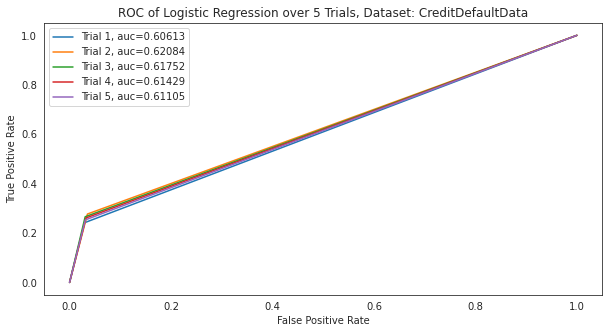

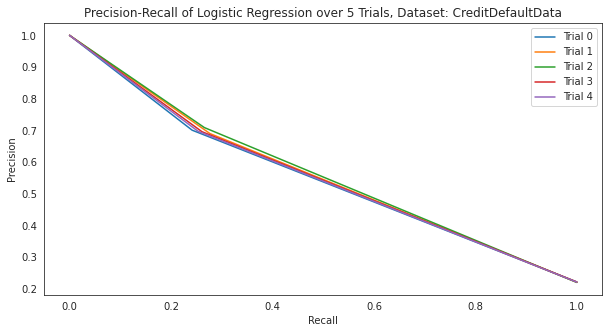

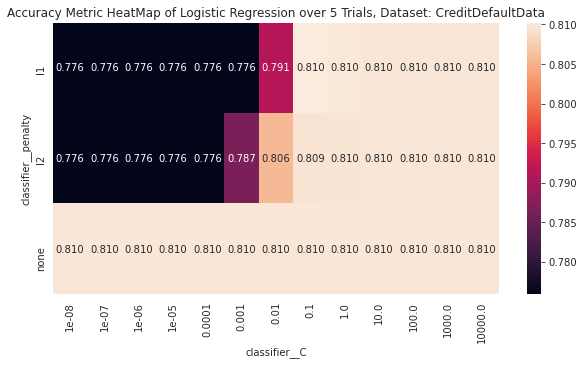

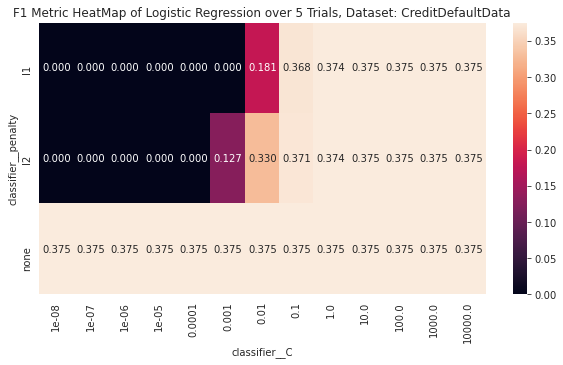

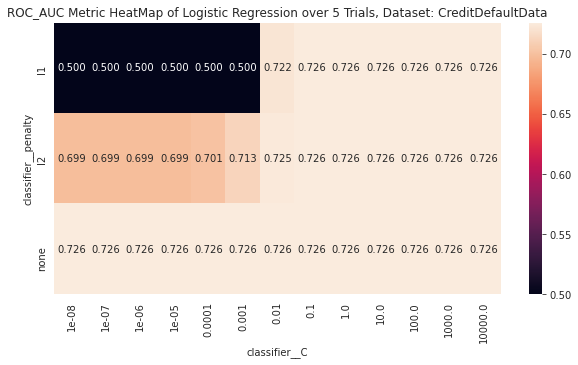

Avg Metric Results for Each Dataset
[[0.97785703 0.87049391 0.90354053]
 [0.98877892 0.97615534 0.99085413]
 [0.8156     0.73397394 0.79123003]
 [0.81192    0.37842889 0.61396647]]
CPU times: user 12 s, sys: 801 ms, total: 12.8 s
Wall time: 2min 17s


In [13]:
%%time
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', LogisticRegression())])

search_space = [{'classifier': [LogisticRegression(max_iter=5000)],
                 'classifier__solver': ['saga'],
                 'classifier__penalty': ['l1', 'l2','none'],
                 'classifier__C': np.logspace(-8, 4, 13)}
                ]

# Function to pass in hyperparameters later
def logistic_create(self, **kwargs):
    return make_pipeline(StandardScaler(),
                         LogisticRegression(**kwargs))

all_trials_logisticReg = []
all_trials_train_logisticReg = []
all_gridsearch_trials_logisticReg = []

algorithm_results = np.zeros([4, 3])

algorithm_results_training = np.zeros([4, 3])

for idx, dataset in enumerate(DatasetList):
    print("Starting Dataset #" + str(idx))
    trial_results = np.zeros([5, 3])
    trial_results_training = np.zeros([5, 3])
    
    plt.figure(0, figsize=(10,5)).clf()
    plt.figure(1, figsize=(10,5)).clf()
    plt.figure(2, figsize=(10,5)).clf()
    plt.figure(3, figsize=(10,5)).clf()
    plt.figure(4, figsize=(10,5)).clf()
    
    gridsearch_trials_logisticReg = []
    
    for trial in range(5):
        
        #Creating new data split and grid searching for params
        
        X_train, X_test, y_train, y_test = train_test_split(
        dataset.iloc[:,:-1], dataset.iloc[:,-1:], train_size=5000)
        
        clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'f1', 'roc_auc'], refit=False,
                   verbose=0, n_jobs = -1)
        
        best_model = clf.fit(X_train, y_train)
        
        #Accuracy
        Accuracy_index = np.argmin(best_model.cv_results_['rank_test_accuracy'])
        Accuracy_param = clf.cv_results_['params'][Accuracy_index]
        Accuracy_model = logistic_create(Accuracy_param).fit(X_train, y_train)
        y_predict = Accuracy_model.predict(X_test)
        train_predict = Accuracy_model.predict(X_train)
        trial_results_training[trial][0] = accuracy_score(y_train, train_predict)
        trial_results[trial][0] = accuracy_score(y_test, y_predict)
        
        #F1
        F1_index = np.argmin(best_model.cv_results_['rank_test_f1'])
        F1_param = clf.cv_results_['params'][F1_index]
        F1_model = logistic_create(F1_param).fit(X_train, y_train)
        y_predict = F1_model.predict(X_test)
        train_predict = F1_model.predict(X_train)
        trial_results_training[trial][1] = f1_score(y_train, train_predict)
        trial_results[trial][1] = f1_score(y_test, y_predict)
        
        #AUC
        AUC_index = np.argmin(best_model.cv_results_['rank_test_roc_auc'])
        AUC_param = clf.cv_results_['params'][AUC_index]
        AUC_model = logistic_create(AUC_param).fit(X_train, y_train)
        train_predict = AUC_model.predict(X_train)
        y_predict = AUC_model.predict(X_test)
        trial_results_training[trial][2] = roc_auc_score(y_train, train_predict)
        trial_results[trial][2] = roc_auc_score(y_test, y_predict)
        
        #Performances during hyperparameter search
        results = pd.DataFrame( best_model.cv_results_['params'] )
        results['accuracy'] = best_model.cv_results_['mean_test_accuracy']
        results['f1'] = best_model.cv_results_['mean_test_f1']
        results['roc_auc'] = best_model.cv_results_['mean_test_roc_auc']
        gridsearch_trials_logisticReg.append(results)
    
        #Plotting curves for each trial
        plt.figure(0)
        fpr, tpr, thresh = roc_curve(y_test, y_predict)
        plt.plot(fpr,tpr,label="Trial " + str(trial+1) + ", auc="+str(round(trial_results[trial][2], 5)))
    
        plt.figure(1)
        precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
        plt.plot(recall,precision,label="Trial " + str(trial))
        
    print("DataSet " + DatasetNames[idx])
    print(trial_results)
    
    #Creating graphics and saving to file
    
    plt.figure(0)
    plt.title('ROC of Logistic Regression over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0)
    plt.savefig('./ROC_Graphs/Logistic_Regression_ROC_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(1)
    plt.title('Precision-Recall of Logistic Regression over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=0)
    plt.savefig('./PR_Graphs/Logistic_Regression_PR_Dataset:'+ DatasetNames[idx]+'.png')
    
    all_gridsearch_trials_logisticReg.append(gridsearch_trials_logisticReg)
    avg_gridsearch = pd.concat(gridsearch_trials_logisticReg).groupby(['classifier'],level=0).agg(
        {'classifier__C':'first', 'classifier__penalty':'first', 'accuracy':'mean', 'f1':'mean', 'roc_auc':'mean'})
    
    
    plt.figure(2)
    sns.heatmap( avg_gridsearch.dropna().pivot('classifier__penalty','classifier__C','accuracy'),
             annot=True, fmt='.3f')
    plt.title('Accuracy Metric HeatMap of Logistic Regression over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./Accuracy_HeatMaps/Logistic_Regression_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(3)
    sns.heatmap( avg_gridsearch.dropna().pivot('classifier__penalty','classifier__C','f1'),
             annot=True, fmt='.3f')
    plt.title('F1 Metric HeatMap of Logistic Regression over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./F1_HeatMaps/Logistic_Regression_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(4)
    sns.heatmap( avg_gridsearch.dropna().pivot('classifier__penalty','classifier__C','roc_auc'),
             annot=True, fmt='.3f')
    plt.title('ROC_AUC Metric HeatMap of Logistic Regression over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./ROC_HeatMaps/Logistic_Regression_Dataset:'+ DatasetNames[idx]+'.png')
    
    
    
    plt.show()
    
    #Adding results to data arrays for later analysis
    
    all_trials_logisticReg.append(trial_results)
    all_trials_train_logisticReg.append(trial_results_training)
    
    
    algorithm_results[idx] = np.mean(trial_results, axis = 0)
    algorithm_results_training[idx] = np.mean(trial_results_training, axis = 0)
    

print("Avg Metric Results for Each Dataset")
print(algorithm_results)
    
        
        
        

## Running DecisionTree on DataSets

Starting Dataset #0
DataSet HTRU2
[[0.96929757 0.83381924 0.90729767]
 [0.96611878 0.81112985 0.9058204 ]
 [0.96883238 0.8211047  0.91493886]
 [0.96712669 0.82372739 0.91263991]
 [0.96852225 0.81860862 0.89940652]]


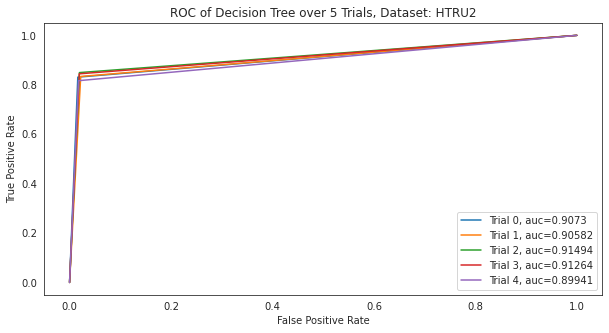

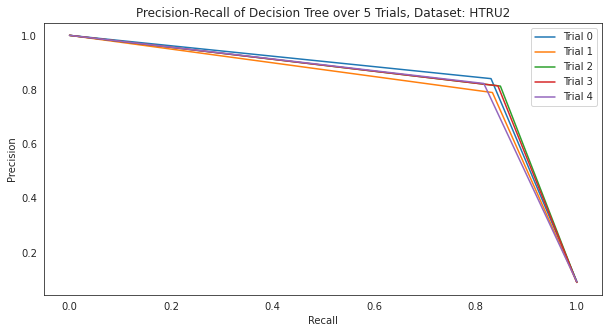

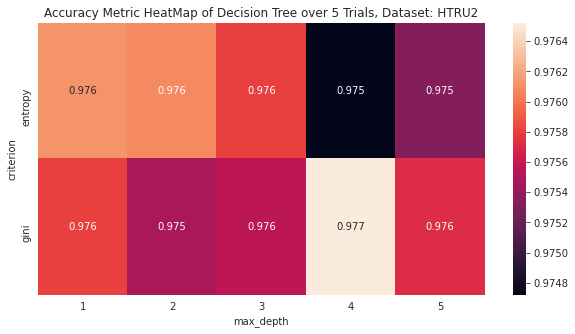

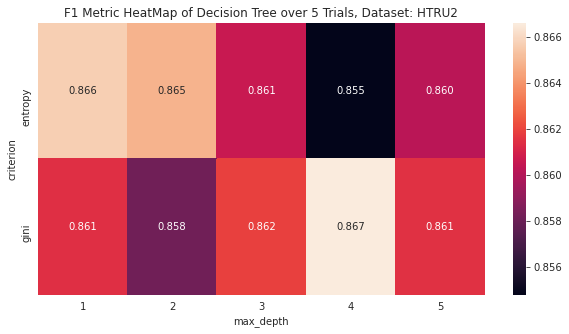

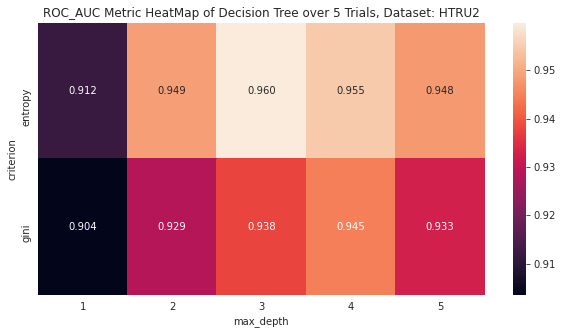

Starting Dataset #1
DataSet OccupancyData
[[0.98849614 0.97499651 0.98421307]
 [0.98663239 0.97029148 0.98093458]
 [0.98746787 0.97475302 0.98534599]
 [0.98701799 0.97356401 0.98126074]
 [0.98489717 0.96753247 0.97622932]]


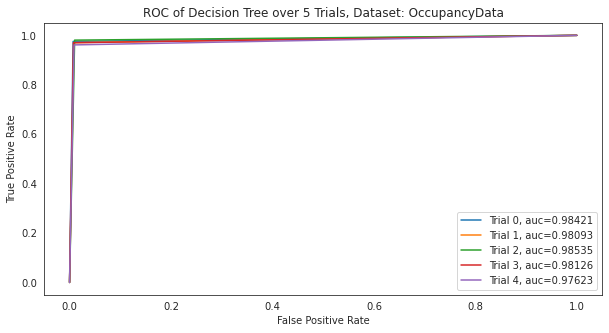

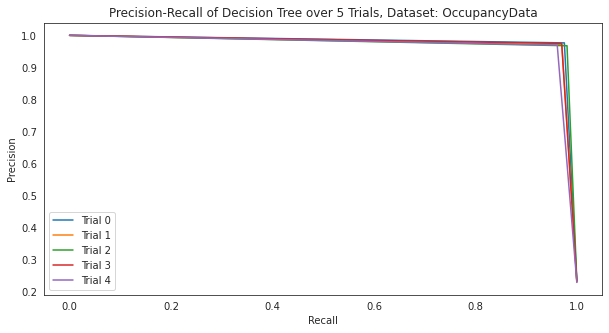

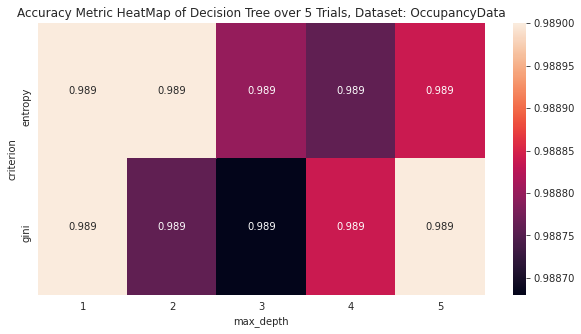

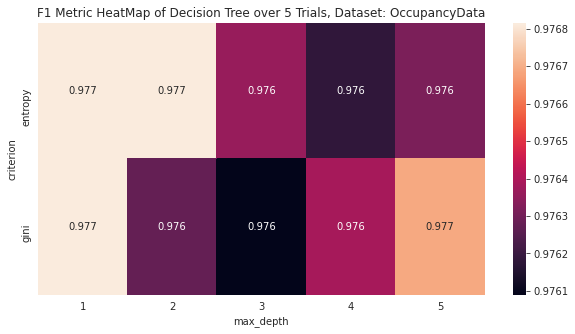

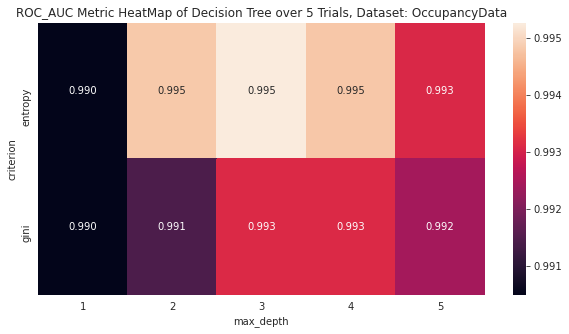

Starting Dataset #2
DataSet ElectricGridData
[[0.826      0.77188108 0.8161103 ]
 [0.8254     0.75912822 0.80937802]
 [0.8292     0.75476053 0.81350184]
 [0.8346     0.77529346 0.82067134]
 [0.8326     0.77348066 0.82009685]]


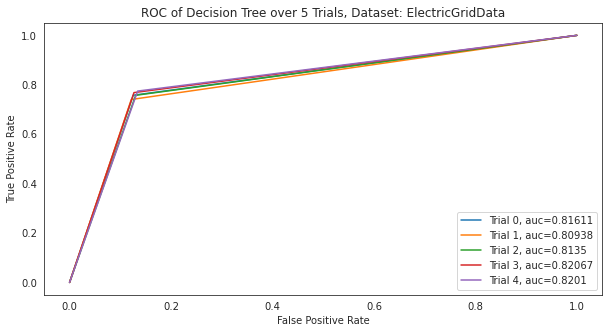

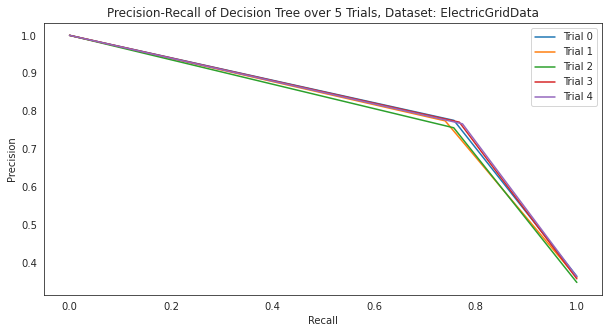

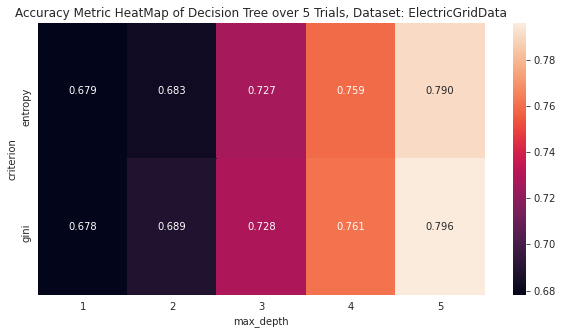

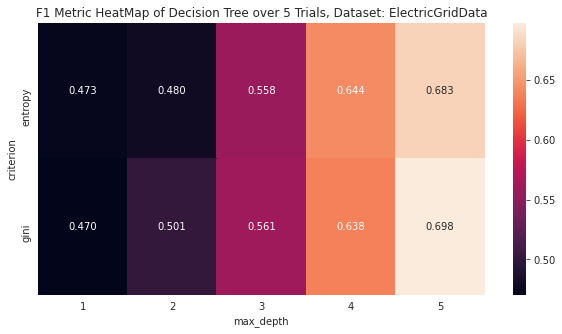

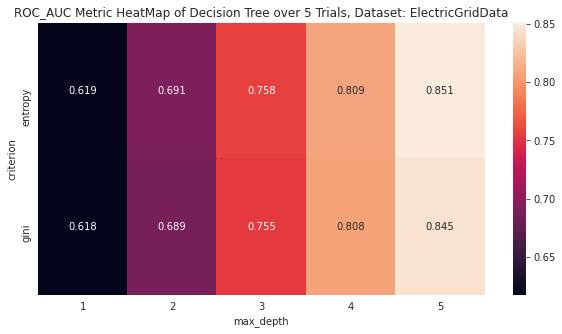

Starting Dataset #3
DataSet CreditDefaultData
[[0.72268    0.3991684  0.6165659 ]
 [0.7224     0.41087923 0.61951548]
 [0.71968    0.39592082 0.6116199 ]
 [0.72352    0.38895241 0.60688386]
 [0.72152    0.39323828 0.61200286]]


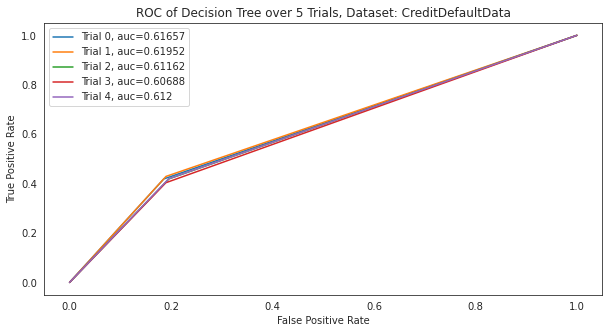

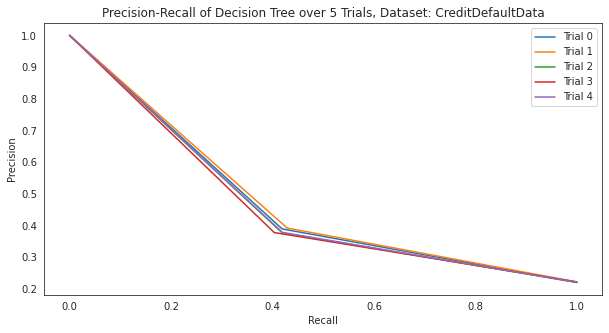

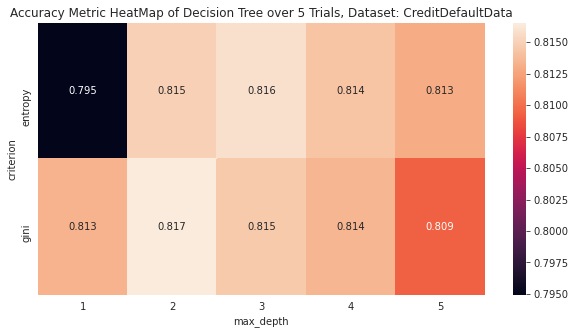

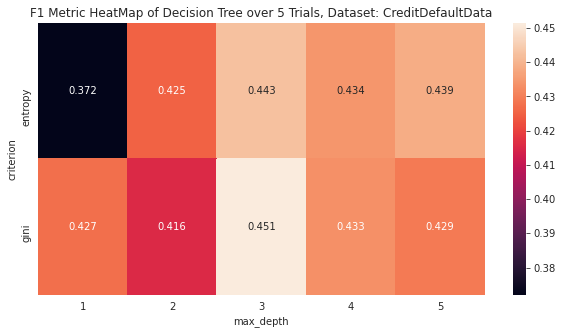

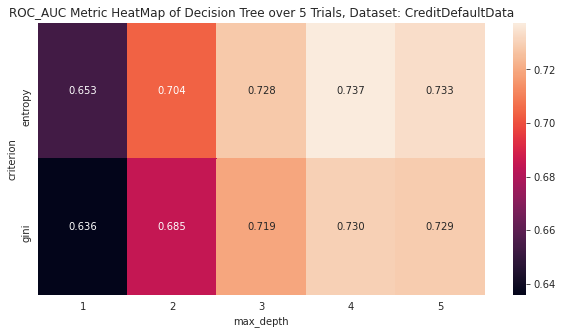

[[0.96797953 0.82167796 0.90802067]
 [0.98690231 0.9722275  0.98159674]
 [0.82956    0.76690879 0.81595167]
 [0.72196    0.39763183 0.6133176 ]]
CPU times: user 8.86 s, sys: 215 ms, total: 9.07 s
Wall time: 11.7 s


In [14]:
%%time

search_space = [{
                 'criterion': ['gini','entropy'],
                 'max_depth': [1,2,3,4,5],
                }]

# Function to pass in hyperparameters later
def Tree_create(self, **kwargs):
    return DecisionTreeClassifier(**kwargs)

all_trials_Tree_algorithm = []
all_trials_train_Tree_algorithm = []
all_gridsearch_trials_Tree_algorithm = []

Tree_algorithm_results = np.zeros([4, 3])

Tree_algorithm_results_training = np.zeros([4, 3])

for idx, dataset in enumerate(DatasetList):
    print("Starting Dataset #" + str(idx))
    trial_results = np.zeros([5, 3])
    trial_results_training = np.zeros([5, 3])
    
    plt.figure(0, figsize=(10,5)).clf()
    plt.figure(1, figsize=(10,5)).clf()
    plt.figure(2, figsize=(10,5)).clf()
    plt.figure(3, figsize=(10,5)).clf()
    plt.figure(4, figsize=(10,5)).clf()
    
    gridsearch_trials_Tree_algorithm = []
    
    
    for trial in range(5):
        
        #Creating new data split and grid searching for params
        
        X_train, X_test, y_train, y_test = train_test_split(
        dataset.iloc[:,:-1], dataset.iloc[:,-1:], train_size=5000)
        
        clf = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'f1', 'roc_auc'], refit=False,
                   verbose=0, n_jobs = -1)
        
        best_model = clf.fit(X_train, y_train)
        
        #Accuracy
        Accuracy_index = np.argmin(best_model.cv_results_['rank_test_accuracy'])
        Accuracy_param = clf.cv_results_['params'][Accuracy_index]
        Accuracy_model = Tree_create(Accuracy_param).fit(X_train, y_train)
        y_predict = Accuracy_model.predict(X_test)
        train_predict = Accuracy_model.predict(X_train)
        trial_results_training[trial][0] = accuracy_score(y_train, train_predict)
        trial_results[trial][0] = accuracy_score(y_test, y_predict)
        
        #F1
        F1_index = np.argmin(best_model.cv_results_['rank_test_f1'])
        F1_param = clf.cv_results_['params'][F1_index]
        F1_model = Tree_create(F1_param).fit(X_train, y_train)
        y_predict = F1_model.predict(X_test)
        train_predict = F1_model.predict(X_train)
        trial_results_training[trial][1] = f1_score(y_train, train_predict)
        trial_results[trial][1] = f1_score(y_test, y_predict)
        
        #AUC
        AUC_index = np.argmin(best_model.cv_results_['rank_test_roc_auc'])
        AUC_param = clf.cv_results_['params'][AUC_index]
        AUC_model = Tree_create(AUC_param).fit(X_train, y_train)
        train_predict = AUC_model.predict(X_train)
        y_predict = AUC_model.predict(X_test)
        trial_results_training[trial][2] = roc_auc_score(y_train, train_predict)
        trial_results[trial][2] = roc_auc_score(y_test, y_predict)
        
        #Performances during hyperparameter search
        results = pd.DataFrame( best_model.cv_results_['params'] )
        results['accuracy'] = best_model.cv_results_['mean_test_accuracy']
        results['f1'] = best_model.cv_results_['mean_test_f1']
        results['roc_auc'] = best_model.cv_results_['mean_test_roc_auc']
        gridsearch_trials_Tree_algorithm.append(results)
        
        #Plotting curves for each trial
        plt.figure(0)
        fpr, tpr, thresh = roc_curve(y_test, y_predict)
        plt.plot(fpr,tpr,label="Trial " + str(trial) + ", auc="+str(round(trial_results[trial][2], 5)))
    
        plt.figure(1)
        precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
        plt.plot(recall,precision,label="Trial " + str(trial))
    
    print("DataSet " + DatasetNames[idx])
    print(trial_results)
    
    #Creating graphics and saving to file
    
    plt.figure(0)
    plt.title('ROC of Decision Tree over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0)
    plt.savefig('./ROC_Graphs/Decision_Tree_ROC_Dataset:'+ DatasetNames[idx]+'.png')
    
    
    plt.figure(1)
    plt.title('Precision-Recall of Decision Tree over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=0)
    plt.savefig('./PR_Graphs/Decision_Tree_PR_Dataset:'+ DatasetNames[idx]+'.png')
    
    all_gridsearch_trials_Tree_algorithm.append(gridsearch_trials_Tree_algorithm)
    avg_gridsearch = pd.concat(gridsearch_trials_Tree_algorithm).groupby(['classifier'],level=0).agg(
        {'criterion':'first', 'max_depth':'first', 'accuracy':'mean', 'f1':'mean', 'roc_auc':'mean'})
    
    plt.figure(2)
    sns.heatmap( avg_gridsearch.dropna().pivot('criterion','max_depth','accuracy'),
             annot=True, fmt='.3f')
    plt.title('Accuracy Metric HeatMap of Decision Tree over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./Accuracy_HeatMaps/Decision_Tree_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(3)
    sns.heatmap( avg_gridsearch.dropna().pivot('criterion','max_depth','f1'),
             annot=True, fmt='.3f')
    plt.title('F1 Metric HeatMap of Decision Tree over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./F1_HeatMaps/Decision_Tree_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(4)
    sns.heatmap( avg_gridsearch.dropna().pivot('criterion','max_depth','roc_auc'),
             annot=True, fmt='.3f')
    plt.title('ROC_AUC Metric HeatMap of Decision Tree over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./ROC_HeatMaps/Decision_Tree_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.show()
    
    #Adding results to data arrays for later analysis
    
    all_trials_Tree_algorithm.append(trial_results)
    all_trials_train_Tree_algorithm.append(trial_results_training)
    
    Tree_algorithm_results[idx] = np.mean(trial_results, axis = 0)
    Tree_algorithm_results_training[idx] = np.mean(trial_results_training, axis = 0)
    
    
print(Tree_algorithm_results)

## Running RandomForest

Starting Dataset #0


<timed exec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

DataSet HTRU2
[[0.97836874 0.87683415 0.91434039]
 [0.97813615 0.87567084 0.91301157]
 [0.97860133 0.87778769 0.90625135]
 [0.97968677 0.87771739 0.90492965]
 [0.97774849 0.87668845 0.92142603]]


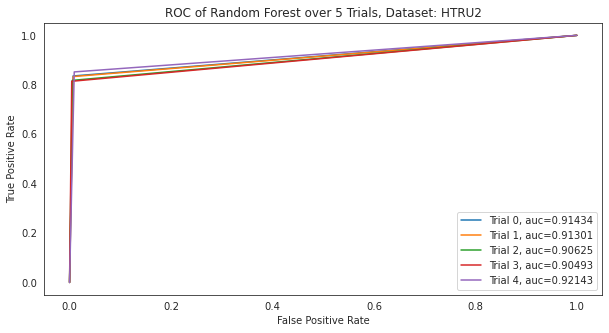

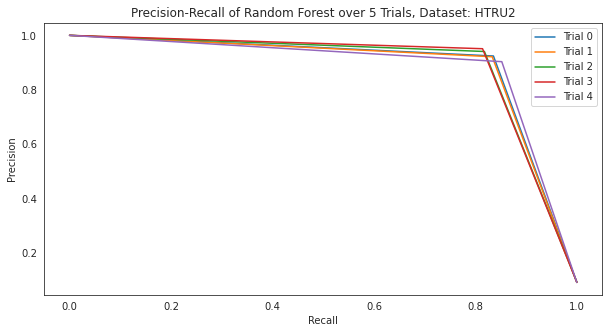

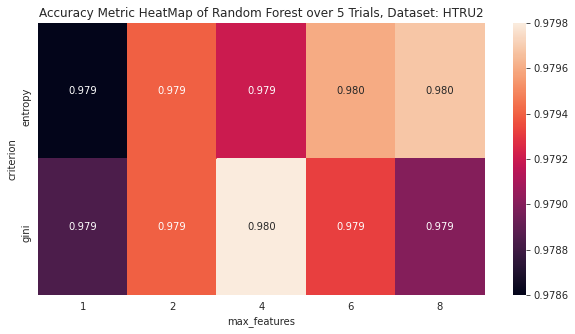

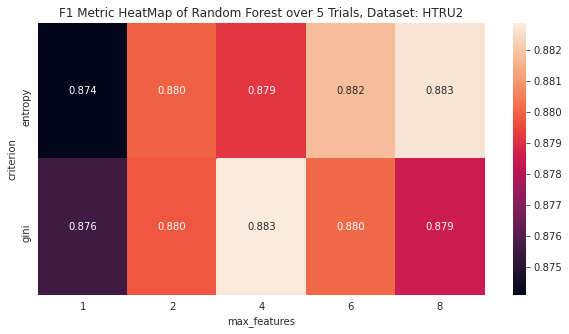

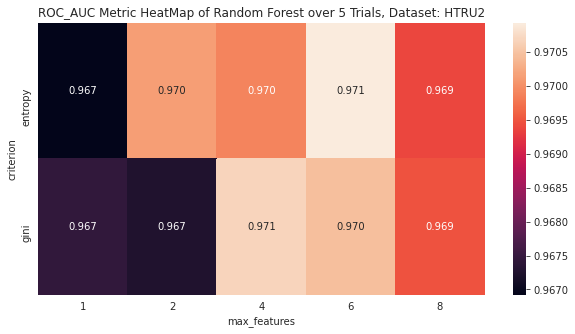

Starting Dataset #1


<timed exec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

DataSet OccupancyData
[[0.9907455  0.98044616 0.98894402]
 [0.99132391 0.980679   0.99043641]
 [0.99125964 0.9808114  0.98969571]
 [0.99170951 0.98199808 0.99194534]
 [0.98978149 0.97847841 0.9895397 ]]


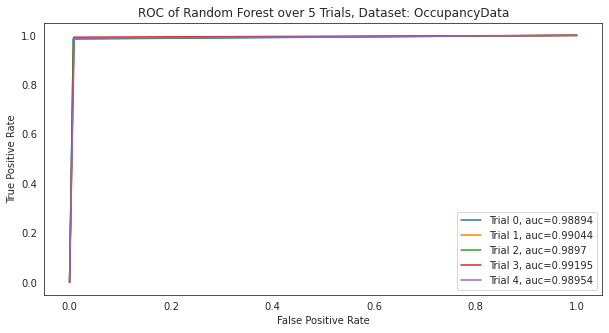

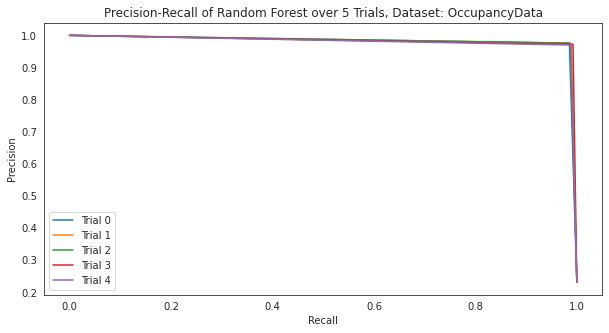

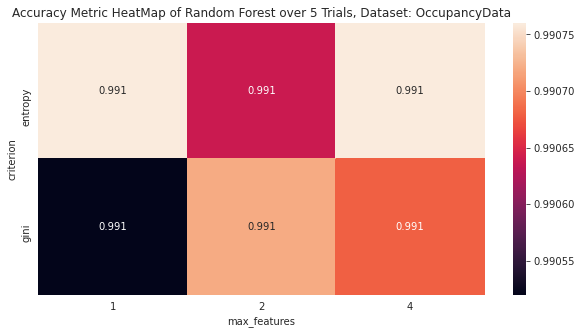

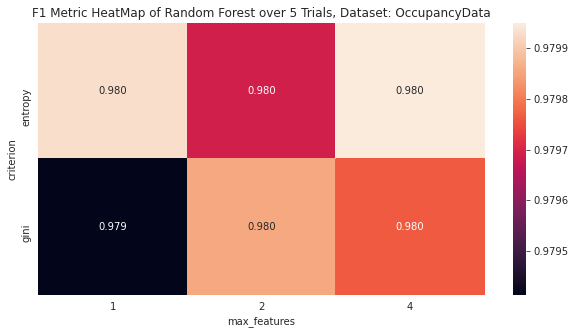

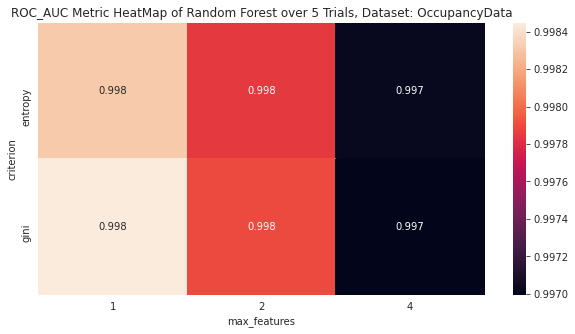

Starting Dataset #2


<timed exec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

DataSet ElectricGridData
[[0.9096     0.86565454 0.89391755]
 [0.9102     0.87365439 0.89438234]
 [0.9152     0.86964233 0.89607692]
 [0.9164     0.8771223  0.89867987]
 [0.9114     0.86956522 0.8925648 ]]


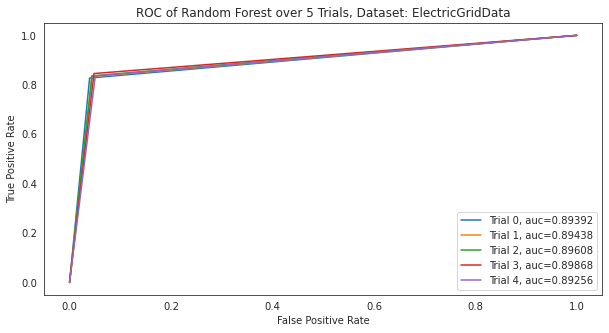

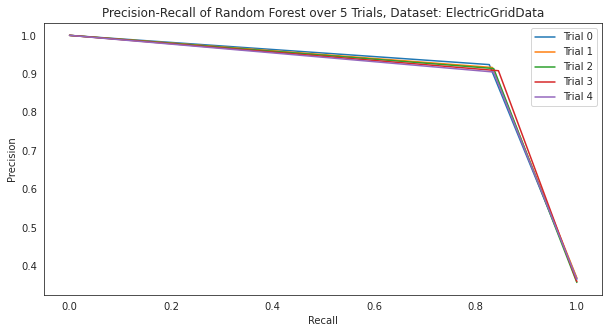

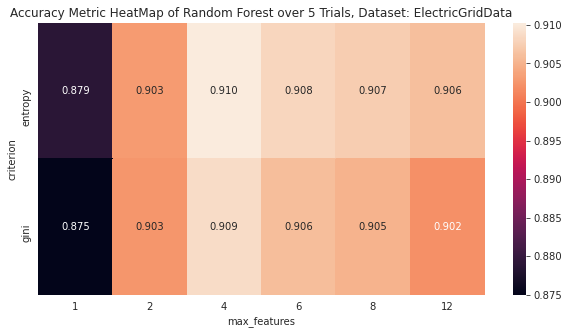

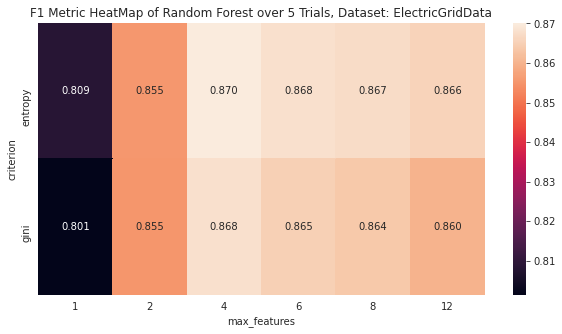

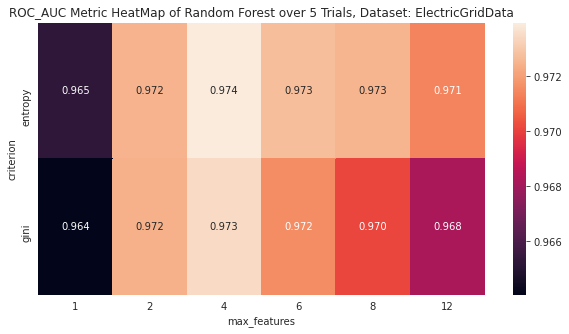

Starting Dataset #3


<timed exec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:53: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
<timed exec>:62: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sample

DataSet CreditDefaultData
[[0.813      0.45705664 0.64969101]
 [0.81128    0.45351264 0.65036322]
 [0.81332    0.47281001 0.65838867]
 [0.81396    0.45200373 0.65040069]
 [0.8118     0.46413019 0.65108406]]


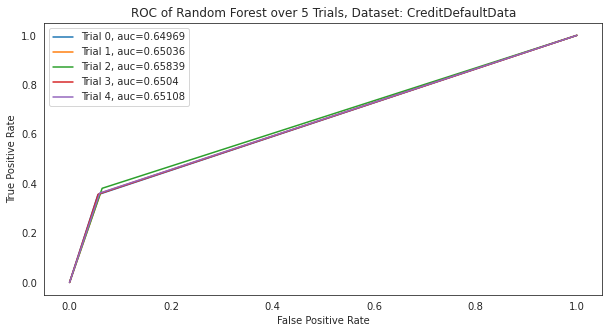

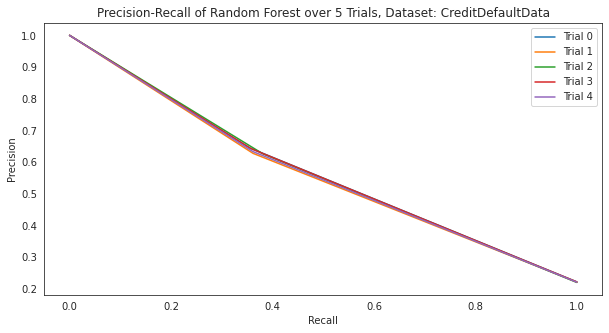

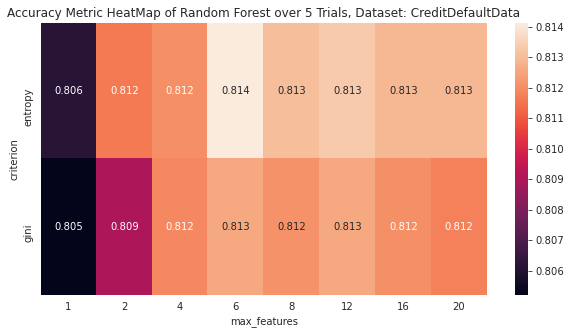

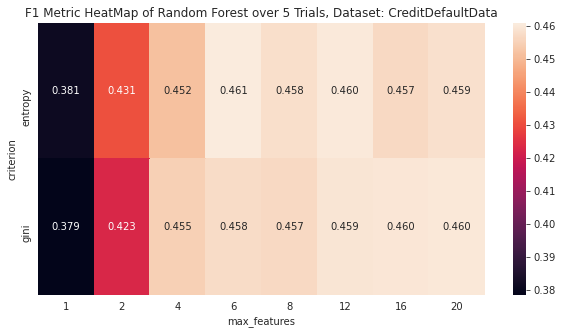

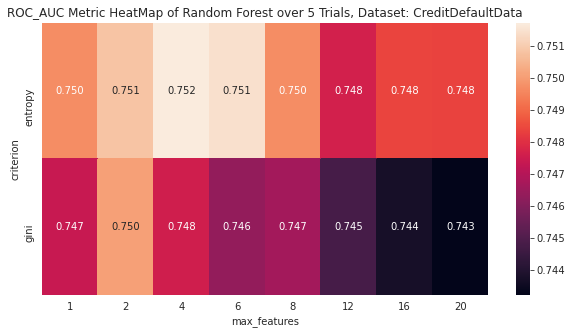

[[0.9785083  0.8769397  0.9119918 ]
 [0.99096401 0.98048261 0.99011224]
 [0.91256    0.87112776 0.89512429]
 [0.812672   0.45990264 0.65198553]]
CPU times: user 58 s, sys: 612 ms, total: 58.6 s
Wall time: 3min 49s


In [15]:
%%time

search_space = [{
                 'criterion': ['gini','entropy'],
                 'max_features': [1,2,4,6,8,12,16,20],
                }]

# Function to pass in hyperparameters later
def RandomForest_create(self, **kwargs):
    return RandomForestClassifier(**kwargs)


all_trials_RandomForest = []
all_trials_train_Tree_RandomForest = []
all_gridsearch_trials_RandomForest = []

RandomForest_algorithm_results = np.zeros([4, 3])
RandomForest_results_training = np.zeros([4, 3])

for idx, dataset in enumerate(DatasetList):
    print("Starting Dataset #" + str(idx))
    trial_results = np.zeros([5, 3])
    trial_results_training = np.zeros([5, 3])
    
    plt.figure(0, figsize=(10,5)).clf()
    plt.figure(1, figsize=(10,5)).clf()
    plt.figure(2, figsize=(10,5)).clf()
    plt.figure(3, figsize=(10,5)).clf()
    plt.figure(4, figsize=(10,5)).clf()
    
    gridsearch_trials_RandomForest = []
    
    for trial in range(5):
        
        #Creating new data split and grid searching for params
        
        X_train, X_test, y_train, y_test = train_test_split(
        dataset.iloc[:,:-1], dataset.iloc[:,-1:], train_size=5000)
        
        clf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'f1', 'roc_auc'], refit=False,
                   verbose=0, n_jobs = -1)
        
        best_model = clf.fit(X_train, y_train)
        
        #Accuracy
        Accuracy_index = np.argmin(best_model.cv_results_['rank_test_accuracy'])
        Accuracy_param = clf.cv_results_['params'][Accuracy_index]
        Accuracy_model = RandomForest_create(Accuracy_param).fit(X_train, y_train)
        y_predict = Accuracy_model.predict(X_test)
        train_predict = Accuracy_model.predict(X_train)
        trial_results_training[trial][0] = accuracy_score(y_train, train_predict)
        trial_results[trial][0] = accuracy_score(y_test, y_predict)
        
        #F1
        F1_index = np.argmin(best_model.cv_results_['rank_test_f1'])
        F1_param = clf.cv_results_['params'][F1_index]
        F1_model = RandomForest_create(F1_param).fit(X_train, y_train)
        y_predict = F1_model.predict(X_test)
        train_predict = F1_model.predict(X_train)
        trial_results_training[trial][1] = f1_score(y_train, train_predict)
        trial_results[trial][1] = f1_score(y_test, y_predict)
        
        #AUC
        AUC_index = np.argmin(best_model.cv_results_['rank_test_roc_auc'])
        AUC_param = clf.cv_results_['params'][AUC_index]
        AUC_model = RandomForest_create(AUC_param).fit(X_train, y_train)
        train_predict = AUC_model.predict(X_train)
        y_predict = AUC_model.predict(X_test)
        trial_results_training[trial][2] = roc_auc_score(y_train, train_predict)
        trial_results[trial][2] = roc_auc_score(y_test, y_predict)
        
        #Performances during hyperparameter search
        results = pd.DataFrame( best_model.cv_results_['params'] )
        results['accuracy'] = best_model.cv_results_['mean_test_accuracy']
        results['f1'] = best_model.cv_results_['mean_test_f1']
        results['roc_auc'] = best_model.cv_results_['mean_test_roc_auc']
        gridsearch_trials_RandomForest.append(results)
        
        #Plotting curves for each trial
        plt.figure(0)
        fpr, tpr, thresh = roc_curve(y_test, y_predict)
        plt.plot(fpr,tpr,label="Trial " + str(trial) + ", auc="+str(round(trial_results[trial][2], 5)))
        
        plt.figure(1)
        precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
        plt.plot(recall,precision,label="Trial " + str(trial))
        
    print("DataSet " + DatasetNames[idx])
    print(trial_results)
    
    #Creating graphics and saving to file
    
    plt.figure(0)
    plt.title('ROC of Random Forest over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0)
    plt.savefig('./ROC_Graphs/Random_Forest_ROC_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(1)
    plt.title('Precision-Recall of Random Forest over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=0)
    plt.savefig('./PR_Graphs/Random_Forest_PR_Dataset:'+ DatasetNames[idx]+'.png')
    
    all_gridsearch_trials_RandomForest.append(gridsearch_trials_RandomForest)
    avg_gridsearch = pd.concat(gridsearch_trials_RandomForest).groupby(['classifier'],level=0).agg(
        {'criterion':'first', 'max_features':'first', 'accuracy':'mean', 'f1':'mean', 'roc_auc':'mean'})
    
    
    plt.figure(2)
    sns.heatmap( avg_gridsearch.dropna().pivot('criterion','max_features','accuracy'),
             annot=True, fmt='.3f')
    plt.title('Accuracy Metric HeatMap of Random Forest over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./Accuracy_HeatMaps/Random_Forest_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(3)
    sns.heatmap( avg_gridsearch.dropna().pivot('criterion','max_features','f1'),
             annot=True, fmt='.3f')
    plt.title('F1 Metric HeatMap of Random Forest over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./F1_HeatMaps/Random_Forest_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(4)
    sns.heatmap( avg_gridsearch.dropna().pivot('criterion','max_features','roc_auc'),
             annot=True, fmt='.3f')
    plt.title('ROC_AUC Metric HeatMap of Random Forest over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./ROC_HeatMaps/Random_Forest_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.show()
    
    #Adding results to data arrays for later analysis
    
    all_trials_RandomForest.append(trial_results)
    all_trials_train_Tree_RandomForest.append(trial_results_training)
    
    RandomForest_algorithm_results[idx] = np.mean(trial_results, axis = 0)
    RandomForest_results_training[idx] = np.mean(trial_results_training, axis = 0)
    
    
print(RandomForest_algorithm_results)

## Running Multilayer Perceptron Network

Starting Dataset #0


/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

DataSet HTRU2
[[0.97914405 0.88126411 0.91778015]
 [0.97968677 0.88184699 0.91535112]
 [0.98077221 0.88937858 0.91987201]
 [0.98030702 0.8881932  0.91555213]
 [0.97844627 0.87285843 0.91500617]]


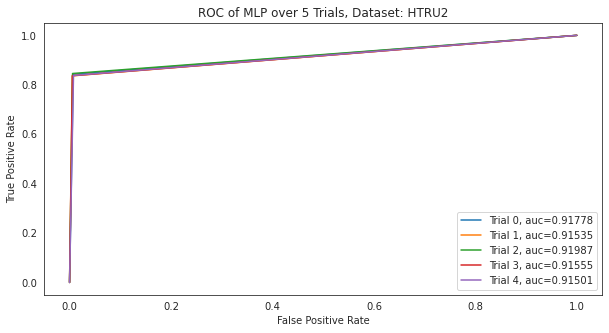

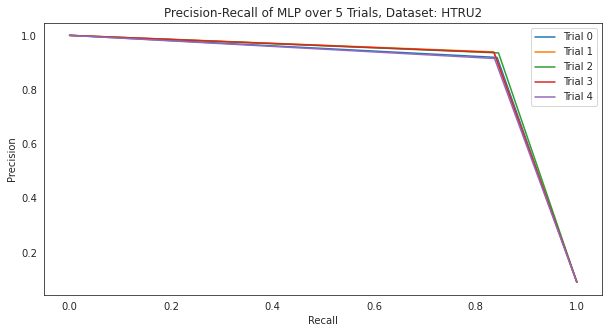

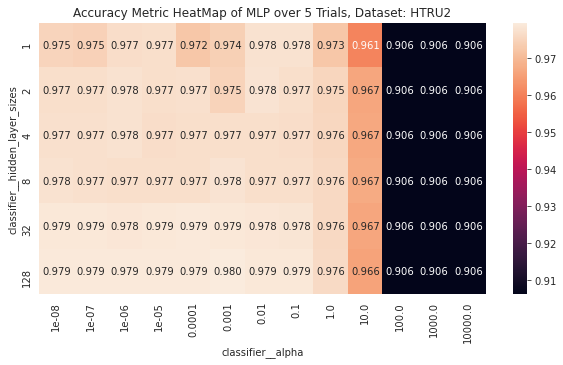

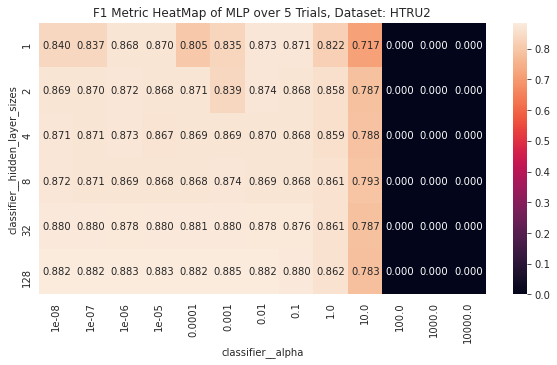

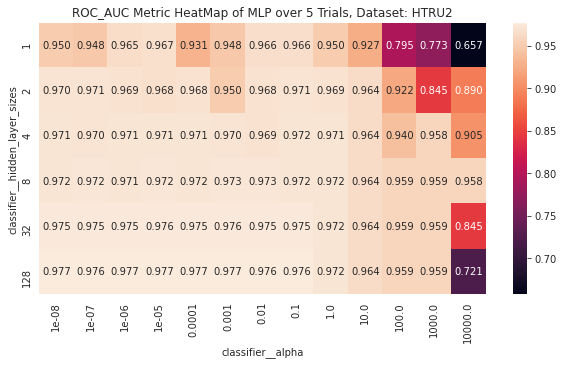

Starting Dataset #1


/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

DataSet OccupancyData
[[0.98804627 0.97474199 0.99082298]
 [0.98849614 0.97521552 0.99027835]
 [0.98939589 0.97728532 0.99148474]
 [0.98881748 0.97635455 0.99092896]
 [0.98888175 0.97633462 0.99112804]]


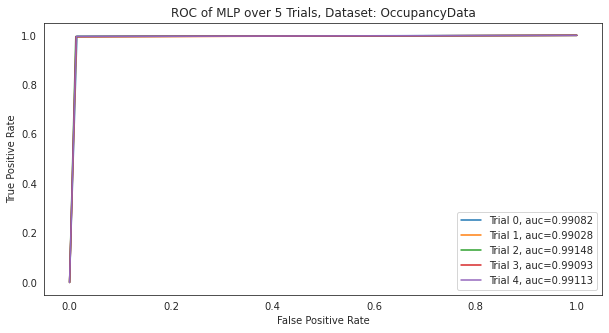

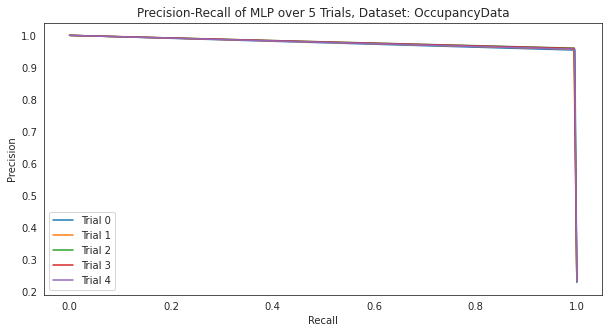

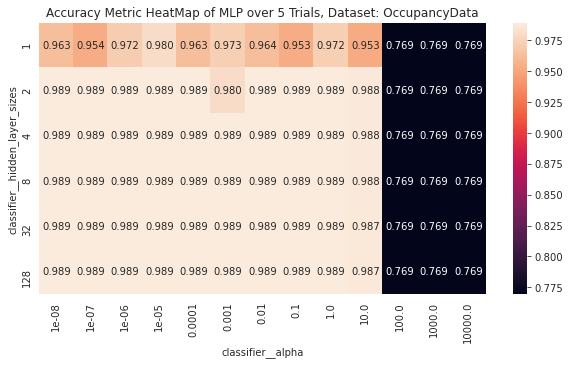

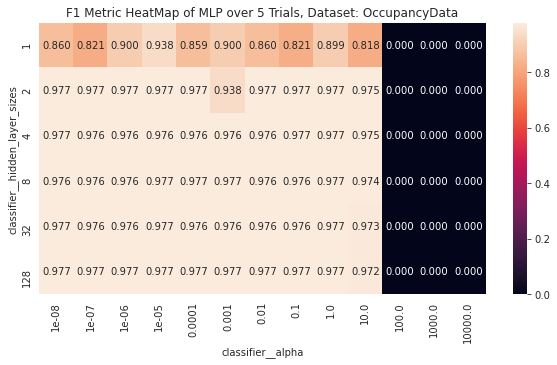

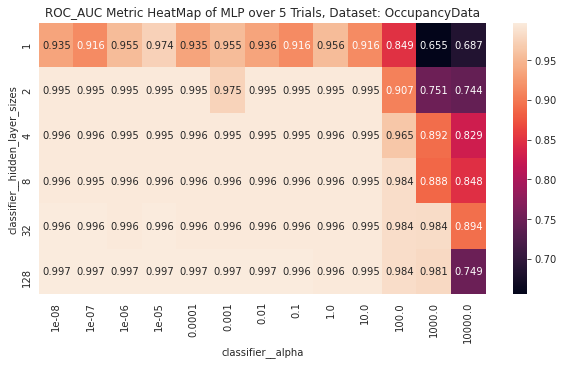

Starting Dataset #2


/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

DataSet ElectricGridData
[[0.9584     0.94104803 0.9571356 ]
 [0.9568     0.93890135 0.95851772]
 [0.9566     0.94084976 0.94866699]
 [0.9512     0.93770673 0.95347152]
 [0.9568     0.94375857 0.95353414]]


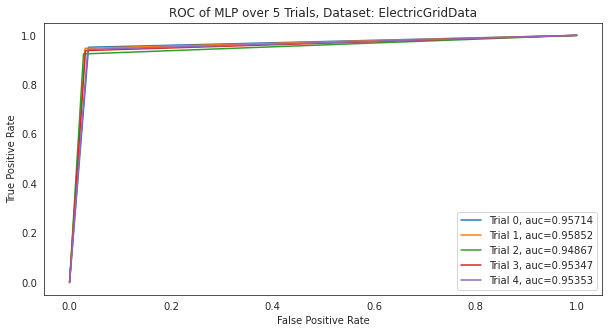

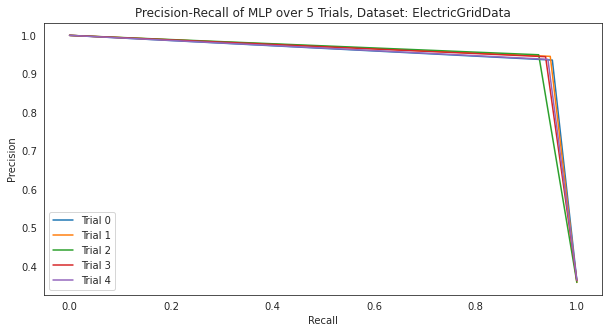

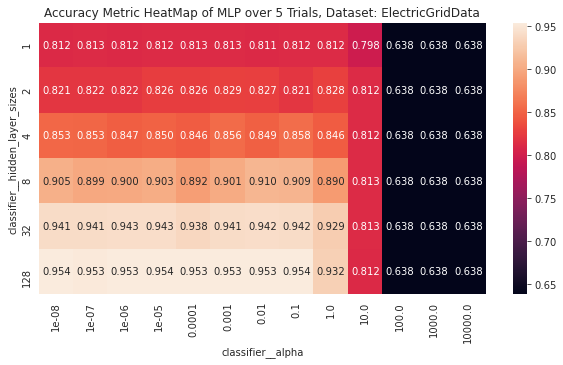

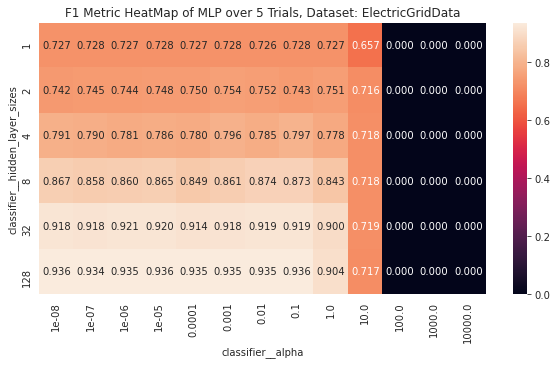

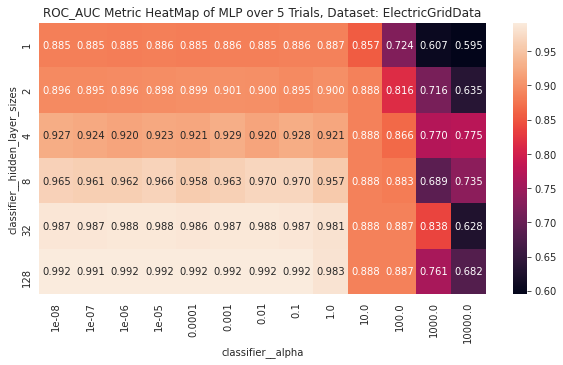

Starting Dataset #3


/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/joshua/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

DataSet CreditDefaultData
[[0.79708    0.43003042 0.64932842]
 [0.78772    0.45570927 0.62127765]
 [0.79496    0.44598571 0.63741365]
 [0.79168    0.45637058 0.64023174]
 [0.79568    0.44739057 0.64877599]]


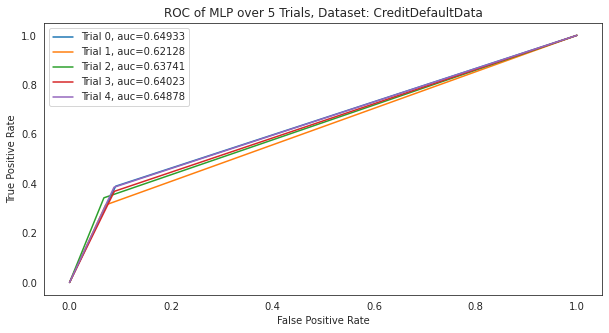

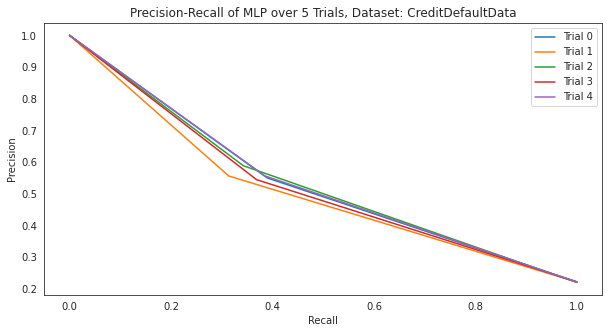

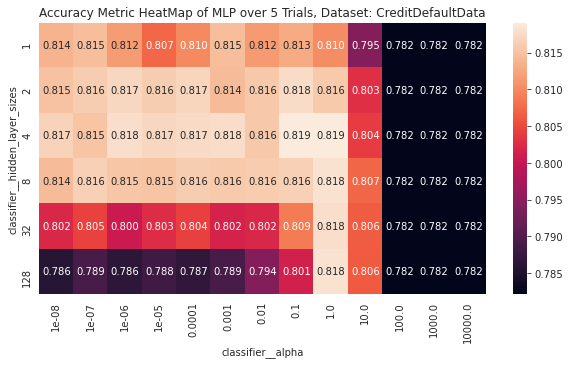

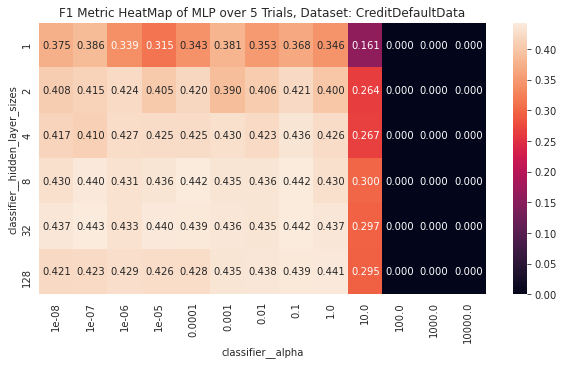

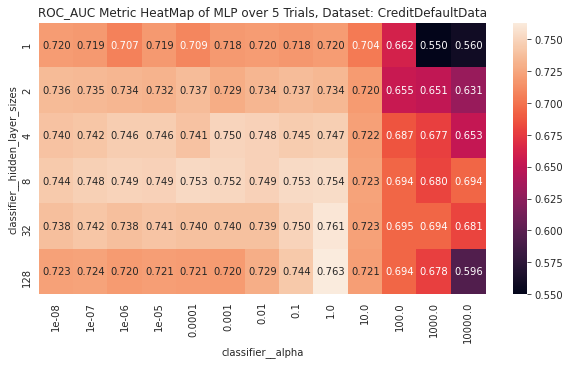

[[0.97967127 0.88270826 0.91671232]
 [0.98872751 0.9759864  0.99092862]
 [0.95596    0.94045289 0.95426519]
 [0.793424   0.44709731 0.63940549]]
CPU times: user 34min 45s, sys: 41.4 s, total: 35min 26s
Wall time: 37min 6s


In [16]:
%%time
pipe = Pipeline([('std', StandardScaler()),
                 ('classifier', MLPClassifier(max_iter=2000))])

search_space = [{'classifier': [MLPClassifier(max_iter=2000)],
                 'classifier__solver': ['adam'],
                 'classifier__hidden_layer_sizes': [1,2,4,8,32,128],
                 'classifier__alpha': np.logspace(-8, 4, 13)
                }]

# Function to pass in hyperparameters later
def MLP_create(self, **kwargs):
    return make_pipeline(StandardScaler(),
                         MLPClassifier(**kwargs, max_iter=2000))

all_trials_MLP = []
all_trials_train_MLP = []
all_gridsearch_trials_MLP = []

MLP_algorithm_results = np.zeros([4, 3])
MLP_algorithm_results_training = np.zeros([4, 3])

for idx, dataset in enumerate(DatasetList):
    print("Starting Dataset #" + str(idx))
    trial_results = np.zeros([5, 3])
    trial_results_training = np.zeros([5, 3])
    
    plt.figure(0, figsize=(10,5)).clf()
    plt.figure(1, figsize=(10,5)).clf()
    plt.figure(2, figsize=(10,5)).clf()
    plt.figure(3, figsize=(10,5)).clf()
    plt.figure(4, figsize=(10,5)).clf()
    
    gridsearch_trials_MLP = []
    
    for trial in range(5):
        
        #Creating new data split and grid searching for params
        
        X_train, X_test, y_train, y_test = train_test_split(
        dataset.iloc[:,:-1], dataset.iloc[:,-1:], train_size=5000)
        
        clf = GridSearchCV(pipe, search_space, cv=StratifiedKFold(n_splits=5), 
                   scoring=['accuracy', 'f1', 'roc_auc'], refit=False,
                   verbose=0, n_jobs = -1)
        
        best_model = clf.fit(X_train, y_train)
        
        #Accuracy
        Accuracy_index = np.argmin(best_model.cv_results_['rank_test_accuracy'])
        Accuracy_param = clf.cv_results_['params'][Accuracy_index]
        Accuracy_model = MLP_create(Accuracy_param).fit(X_train, y_train)
        y_predict = Accuracy_model.predict(X_test)
        train_predict = Accuracy_model.predict(X_train)
        trial_results_training[trial][0] = accuracy_score(y_train, train_predict)
        trial_results[trial][0] = accuracy_score(y_test, y_predict)

        #F1
        F1_index = np.argmin(best_model.cv_results_['rank_test_f1'])
        F1_param = clf.cv_results_['params'][F1_index]
        F1_model = MLP_create(F1_param).fit(X_train, y_train)
        y_predict = F1_model.predict(X_test)
        train_predict = F1_model.predict(X_train)
        trial_results_training[trial][1] = f1_score(y_train, train_predict)
        trial_results[trial][1] = f1_score(y_test, y_predict)
        
        #AUC
        AUC_index = np.argmin(best_model.cv_results_['rank_test_roc_auc'])
        AUC_param = clf.cv_results_['params'][AUC_index]
        AUC_model = MLP_create(AUC_param).fit(X_train, y_train)
        train_predict = AUC_model.predict(X_train)
        y_predict = AUC_model.predict(X_test)
        trial_results_training[trial][2] = roc_auc_score(y_train, train_predict)
        trial_results[trial][2] = roc_auc_score(y_test, y_predict)
        
        #Performances during hyperparameter search
        results = pd.DataFrame( best_model.cv_results_['params'] )
        results['accuracy'] = best_model.cv_results_['mean_test_accuracy']
        results['f1'] = best_model.cv_results_['mean_test_f1']
        results['roc_auc'] = best_model.cv_results_['mean_test_roc_auc']
        gridsearch_trials_MLP.append(results)
        
        #Plotting curves for each trial
        plt.figure(0)
        fpr, tpr, thresh = roc_curve(y_test, y_predict)
        plt.plot(fpr,tpr,label="Trial " + str(trial) + ", auc="+str(round(trial_results[trial][2], 5)))

        plt.figure(1)
        precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
        plt.plot(recall,precision,label="Trial " + str(trial))
        
    print("DataSet " + DatasetNames[idx])
    print(trial_results)
    
    #Creating graphics and saving to file

    plt.figure(0)
    plt.title('ROC of MLP over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=0)
    plt.savefig('./ROC_Graphs/MLP_ROC_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(1)
    plt.title('Precision-Recall of MLP over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc=0)
    plt.savefig('./PR_Graphs/MLP_PR_Dataset:'+ DatasetNames[idx]+'.png')
    
    all_gridsearch_trials_MLP.append(gridsearch_trials_MLP)
    avg_gridsearch = pd.concat(gridsearch_trials_MLP).groupby(['classifier'],level=0).agg(
        {'classifier__alpha':'first', 'classifier__hidden_layer_sizes':'first', 'accuracy':'mean', 'f1':'mean', 'roc_auc':'mean'})
    
    plt.figure(2)
    sns.heatmap( avg_gridsearch.dropna().pivot('classifier__hidden_layer_sizes','classifier__alpha','accuracy'),
             annot=True, fmt='.3f')
    plt.title('Accuracy Metric HeatMap of MLP over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./Accuracy_HeatMaps/MLP_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(3)
    sns.heatmap( avg_gridsearch.dropna().pivot('classifier__hidden_layer_sizes','classifier__alpha','f1'),
             annot=True, fmt='.3f')
    plt.title('F1 Metric HeatMap of MLP over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./F1_HeatMaps/MLP_Dataset:'+ DatasetNames[idx]+'.png')
    
    plt.figure(4)
    sns.heatmap( avg_gridsearch.dropna().pivot('classifier__hidden_layer_sizes','classifier__alpha','roc_auc'),
             annot=True, fmt='.3f')
    plt.title('ROC_AUC Metric HeatMap of MLP over 5 Trials, Dataset: ' + DatasetNames[idx])
    plt.savefig('./ROC_HeatMaps/MLP_Dataset:'+ DatasetNames[idx]+'.png')
    
    
    plt.show()
    
    #Adding results to data arrays for later analysis
    
    all_trials_MLP.append(trial_results)
    all_trials_train_MLP.append(trial_results_training)
    
    MLP_algorithm_results[idx] = np.mean(trial_results, axis = 0)
    MLP_algorithm_results_training[idx] = np.mean(trial_results_training, axis = 0)
    
    
print(MLP_algorithm_results)

In [17]:
print(algorithm_results)
print(Tree_algorithm_results)
print(RandomForest_algorithm_results)
print(MLP_algorithm_results)

[[0.97785703 0.87049391 0.90354053]
 [0.98877892 0.97615534 0.99085413]
 [0.8156     0.73397394 0.79123003]
 [0.81192    0.37842889 0.61396647]]
[[0.96797953 0.82167796 0.90802067]
 [0.98690231 0.9722275  0.98159674]
 [0.82956    0.76690879 0.81595167]
 [0.72196    0.39763183 0.6133176 ]]
[[0.9785083  0.8769397  0.9119918 ]
 [0.99096401 0.98048261 0.99011224]
 [0.91256    0.87112776 0.89512429]
 [0.812672   0.45990264 0.65198553]]
[[0.97967127 0.88270826 0.91671232]
 [0.98872751 0.9759864  0.99092862]
 [0.95596    0.94045289 0.95426519]
 [0.793424   0.44709731 0.63940549]]


In [18]:
print(algorithm_results_training)
print(Tree_algorithm_results_training)
print(RandomForest_results_training)
print(MLP_algorithm_results_training)

[[0.97892    0.87629369 0.90577973]
 [0.98956    0.97787777 0.99205672]
 [0.81672    0.73700566 0.79359675]
 [0.81156    0.38058196 0.61497809]]
[[1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.9998     0.99954742 0.9995477 ]]
[[1.         1.         0.99997798]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.99992    0.99972922 0.99979349]]
[[0.9814     0.89515497 0.92335172]
 [0.9896     0.97813854 0.99217795]
 [0.99988    1.         0.99996878]
 [0.879      0.71678802 0.76529801]]


In [20]:
print(all_trials_logisticReg)
print(all_trials_Tree_algorithm)
print(all_trials_RandomForest)
print(all_trials_MLP)

[array([[0.97705071, 0.86129335, 0.89679879],
       [0.97743836, 0.87186262, 0.90724044],
       [0.97914405, 0.87744875, 0.90889521],
       [0.9787564 , 0.87442713, 0.90369693],
       [0.97689564, 0.86743772, 0.90107127]]), array([[0.98881748, 0.9760989 , 0.99077761],
       [0.98894602, 0.97647059, 0.9910598 ],
       [0.98868895, 0.97605442, 0.99079866],
       [0.98888175, 0.97628513, 0.99082131],
       [0.98856041, 0.97586768, 0.99081327]]), array([[0.8166    , 0.7336625 , 0.78860039],
       [0.8178    , 0.73323572, 0.79179548],
       [0.8162    , 0.73765344, 0.79329705],
       [0.8116    , 0.72868664, 0.78852304],
       [0.8158    , 0.7366314 , 0.79393417]]), array([[0.8094    , 0.35928466, 0.60613208],
       [0.81324   , 0.3951289 , 0.62083804],
       [0.81468   , 0.38660135, 0.61751732],
       [0.81132   , 0.37958701, 0.61429018],
       [0.81096   , 0.37154255, 0.61105473]])]
[array([[0.96929757, 0.83381924, 0.90729767],
       [0.96611878, 0.81112985, 0.9058204 ],


## Average Metric Performance (Algorithm/Metric Combinations)

In [21]:
avg_metric_algorithm = pd.DataFrame(index=['Log_Reg', 'Tree', 'Random_Forest', 'MLP'], columns = ['Accuracy','F1','ROC_AUC', 'Mean Performance'])
avg_metric_algorithm.loc['Log_Reg'] = np.append(np.mean(algorithm_results, axis = 0), np.mean(np.mean(algorithm_results, axis = 0)))
avg_metric_algorithm.loc['Tree'] = np.append(np.mean(Tree_algorithm_results, axis = 0), np.mean(np.mean(Tree_algorithm_results, axis = 0)))
avg_metric_algorithm.loc['Random_Forest'] = np.append(np.mean(RandomForest_algorithm_results, axis = 0), np.mean(np.mean(RandomForest_algorithm_results, axis = 0)))
avg_metric_algorithm.loc['MLP'] = np.append(np.mean(MLP_algorithm_results, axis = 0), np.mean(np.mean(MLP_algorithm_results, axis = 0)))

In [22]:
display(avg_metric_algorithm)

,Accuracy,F1,ROC_AUC,Mean Performance
Log_Reg,0.898539,0.739763,0.824898,0.821067
Tree,0.8766,0.739612,0.829722,0.815311
Random_Forest,0.923676,0.797113,0.862303,0.861031
MLP,0.929446,0.811561,0.875328,0.872112


## Average Test Performance (Algorithm/Dataset Combinations)

In [23]:
avg_problem_algorithm = pd.DataFrame(index=['Log_Reg', 'Tree', 'Random_Forest', 'MLP'], columns = ['HTRU2','Occupancy','ElectricGrid','CreditDefault', 'Mean Performance'])
avg_problem_algorithm.loc['Log_Reg'] = np.append(np.mean(algorithm_results, axis = 1), np.mean(np.mean(algorithm_results, axis = 1)))
avg_problem_algorithm.loc['Tree'] = np.append(np.mean(Tree_algorithm_results, axis = 1), np.mean(np.mean(Tree_algorithm_results, axis = 1)))
avg_problem_algorithm.loc['Random_Forest'] = np.append(np.mean(RandomForest_algorithm_results, axis = 1), np.mean(np.mean(RandomForest_algorithm_results, axis = 1)))
avg_problem_algorithm.loc['MLP'] = np.append(np.mean(MLP_algorithm_results, axis = 1), np.mean(np.mean(MLP_algorithm_results, axis = 1)))

In [24]:
display(avg_problem_algorithm)

,HTRU2,Occupancy,ElectricGrid,CreditDefault,Mean Performance
Log_Reg,0.917297,0.985263,0.780268,0.601438,0.821067
Tree,0.899226,0.980242,0.80414,0.577636,0.815311
Random_Forest,0.92248,0.987186,0.892937,0.64152,0.861031
MLP,0.926364,0.985214,0.950226,0.626642,0.872112


## Average Training Performance (Algorithm/Dataset Combinations)

In [25]:
avg_training_performance = pd.DataFrame(index=['Log_Reg', 'Tree', 'Random_Forest', 'MLP'], columns = ['HTRU2','Occupancy','ElectricGrid','CreditDefault', 'Mean Performance'])
avg_training_performance.loc['Log_Reg'] = np.append(np.mean(algorithm_results_training, axis = 1), np.mean(np.mean(algorithm_results_training, axis = 1)))
avg_training_performance.loc['Tree'] = np.append(np.mean(Tree_algorithm_results_training, axis = 1), np.mean(np.mean(Tree_algorithm_results_training, axis = 1)))
avg_training_performance.loc['Random_Forest'] = np.append(np.mean(RandomForest_results_training, axis = 1), np.mean(np.mean(RandomForest_results_training, axis = 1)))
avg_training_performance.loc['MLP'] = np.append(np.mean(MLP_algorithm_results_training, axis = 1), np.mean(np.mean(MLP_algorithm_results_training, axis = 1)))

In [26]:
display(avg_training_performance)

,HTRU2,Occupancy,ElectricGrid,CreditDefault,Mean Performance
Log_Reg,0.920331,0.986498,0.782441,0.602373,0.822911
Tree,1,1,1,0.999632,0.999908
Random_Forest,0.999993,1,1,0.999814,0.999952
MLP,0.933302,0.986639,0.99995,0.787029,0.92673


## Raw scores for Logistic Regression

In [27]:
MetricList = ["Accuracy", "F1", "ROC_AUC"]
log_reg_raw = pd.DataFrame(columns = ["Trial 1","Trial 2","Trial 3","Trial 4", "Trial 5", "Avg"])
for idx, dataset in enumerate(DatasetNames):
    for idy, metric in enumerate(MetricList):
        log_reg_raw.loc[dataset + "_" + metric] = np.append(
            all_trials_logisticReg[idx][0][idy], [
                all_trials_logisticReg[idx][1][idy],
                all_trials_logisticReg[idx][2][idy],
                all_trials_logisticReg[idx][3][idy],
                all_trials_logisticReg[idx][4][idy],
                algorithm_results[idx][idy]
            ])
display(log_reg_raw)

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Avg
HTRU2_Accuracy,0.977051,0.977438,0.979144,0.978756,0.976896,0.977857
HTRU2_F1,0.861293,0.871863,0.877449,0.874427,0.867438,0.870494
HTRU2_ROC_AUC,0.896799,0.907240,0.908895,0.903697,0.901071,0.903541
OccupancyData_Accuracy,0.988817,0.988946,0.988689,0.988882,0.988560,0.988779
OccupancyData_F1,0.976099,0.976471,0.976054,0.976285,0.975868,0.976155
OccupancyData_ROC_AUC,0.990778,0.991060,0.990799,0.990821,0.990813,0.990854
ElectricGridData_Accuracy,0.816600,0.817800,0.816200,0.811600,0.815800,0.815600
ElectricGridData_F1,0.733663,0.733236,0.737653,0.728687,0.736631,0.733974
ElectricGridData_ROC_AUC,0.788600,0.791795,0.793297,0.788523,0.793934,0.791230
CreditDefaultData_Accuracy,0.809400,0.813240,0.814680,0.811320,0.810960,0.811920


## Raw scores for Tree Algorithm

In [28]:
MetricList = ["Accuracy", "F1", "ROC_AUC"]
tree_raw = pd.DataFrame(columns = ["Trial 1","Trial 2","Trial 3","Trial 4", "Trial 5", "Avg"])
for idx, dataset in enumerate(DatasetNames):
    for idy, metric in enumerate(MetricList):
        tree_raw.loc[dataset + "_" + metric] = np.append(
            all_trials_Tree_algorithm[idx][0][idy], [
                all_trials_Tree_algorithm[idx][1][idy],
                all_trials_Tree_algorithm[idx][2][idy],
                all_trials_Tree_algorithm[idx][3][idy],
                all_trials_Tree_algorithm[idx][4][idy],
                Tree_algorithm_results[idx][idy]
            ])
display(tree_raw)

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Avg
HTRU2_Accuracy,0.969298,0.966119,0.968832,0.967127,0.968522,0.967980
HTRU2_F1,0.833819,0.811130,0.821105,0.823727,0.818609,0.821678
HTRU2_ROC_AUC,0.907298,0.905820,0.914939,0.912640,0.899407,0.908021
OccupancyData_Accuracy,0.988496,0.986632,0.987468,0.987018,0.984897,0.986902
OccupancyData_F1,0.974997,0.970291,0.974753,0.973564,0.967532,0.972227
OccupancyData_ROC_AUC,0.984213,0.980935,0.985346,0.981261,0.976229,0.981597
ElectricGridData_Accuracy,0.826000,0.825400,0.829200,0.834600,0.832600,0.829560
ElectricGridData_F1,0.771881,0.759128,0.754761,0.775293,0.773481,0.766909
ElectricGridData_ROC_AUC,0.816110,0.809378,0.813502,0.820671,0.820097,0.815952
CreditDefaultData_Accuracy,0.722680,0.722400,0.719680,0.723520,0.721520,0.721960


## Raw scores for Random Forest

In [29]:
MetricList = ["Accuracy", "F1", "ROC_AUC"]
randomforest_raw = pd.DataFrame(columns = ["Trial 1","Trial 2","Trial 3","Trial 4", "Trial 5", "Avg"])
for idx, dataset in enumerate(DatasetNames):
    for idy, metric in enumerate(MetricList):
        randomforest_raw.loc[dataset + "_" + metric] = np.append(
            all_trials_RandomForest[idx][0][idy], [
                all_trials_RandomForest[idx][1][idy],
                all_trials_RandomForest[idx][2][idy],
                all_trials_RandomForest[idx][3][idy],
                all_trials_RandomForest[idx][4][idy],
                RandomForest_algorithm_results[idx][idy]
            ])
display(randomforest_raw)

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Avg
HTRU2_Accuracy,0.978369,0.978136,0.978601,0.979687,0.977748,0.978508
HTRU2_F1,0.876834,0.875671,0.877788,0.877717,0.876688,0.876940
HTRU2_ROC_AUC,0.914340,0.913012,0.906251,0.904930,0.921426,0.911992
OccupancyData_Accuracy,0.990746,0.991324,0.991260,0.991710,0.989781,0.990964
OccupancyData_F1,0.980446,0.980679,0.980811,0.981998,0.978478,0.980483
OccupancyData_ROC_AUC,0.988944,0.990436,0.989696,0.991945,0.989540,0.990112
ElectricGridData_Accuracy,0.909600,0.910200,0.915200,0.916400,0.911400,0.912560
ElectricGridData_F1,0.865655,0.873654,0.869642,0.877122,0.869565,0.871128
ElectricGridData_ROC_AUC,0.893918,0.894382,0.896077,0.898680,0.892565,0.895124
CreditDefaultData_Accuracy,0.813000,0.811280,0.813320,0.813960,0.811800,0.812672


## Raw scores for MLP

In [30]:
MetricList = ["Accuracy", "F1", "ROC_AUC"]
MLP_raw = pd.DataFrame(columns = ["Trial 1","Trial 2","Trial 3","Trial 4", "Trial 5", "Avg"])
for idx, dataset in enumerate(DatasetNames):
    for idy, metric in enumerate(MetricList):
        MLP_raw.loc[dataset + "_" + metric] = np.append(
            all_trials_MLP[idx][0][idy], [
                all_trials_MLP[idx][1][idy],
                all_trials_MLP[idx][2][idy],
                all_trials_MLP[idx][3][idy],
                all_trials_MLP[idx][4][idy],
                MLP_algorithm_results[idx][idy]
            ])
display(MLP_raw)

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Avg
HTRU2_Accuracy,0.979144,0.979687,0.980772,0.980307,0.978446,0.979671
HTRU2_F1,0.881264,0.881847,0.889379,0.888193,0.872858,0.882708
HTRU2_ROC_AUC,0.917780,0.915351,0.919872,0.915552,0.915006,0.916712
OccupancyData_Accuracy,0.988046,0.988496,0.989396,0.988817,0.988882,0.988728
OccupancyData_F1,0.974742,0.975216,0.977285,0.976355,0.976335,0.975986
OccupancyData_ROC_AUC,0.990823,0.990278,0.991485,0.990929,0.991128,0.990929
ElectricGridData_Accuracy,0.958400,0.956800,0.956600,0.951200,0.956800,0.955960
ElectricGridData_F1,0.941048,0.938901,0.940850,0.937707,0.943759,0.940453
ElectricGridData_ROC_AUC,0.957136,0.958518,0.948667,0.953472,0.953534,0.954265
CreditDefaultData_Accuracy,0.797080,0.787720,0.794960,0.791680,0.795680,0.793424


## P-values for Average Metric Performance (Algorithm/Metric Combinations)

In [31]:
display(avg_metric_algorithm)

,Accuracy,F1,ROC_AUC,Mean Performance
Log_Reg,0.898539,0.739763,0.824898,0.821067
Tree,0.8766,0.739612,0.829722,0.815311
Random_Forest,0.923676,0.797113,0.862303,0.861031
MLP,0.929446,0.811561,0.875328,0.872112


In [32]:
all_trials = [all_trials_logisticReg,all_trials_Tree_algorithm,all_trials_RandomForest,all_trials_MLP]

avg_metric_p_values = pd.DataFrame(index=['Log_Reg', 'Tree', 'Random_Forest', 'MLP'], columns = ['Accuracy','F1','ROC_AUC', 'Mean Performance'])

best_ACC = avg_metric_algorithm.index.get_loc(pd.to_numeric(avg_metric_algorithm['Accuracy']).idxmax())
best_F1 = avg_metric_algorithm.index.get_loc(pd.to_numeric(avg_metric_algorithm['F1']).idxmax())
best_ROC = avg_metric_algorithm.index.get_loc(pd.to_numeric(avg_metric_algorithm['ROC_AUC']).idxmax())
best_mean = avg_metric_algorithm.index.get_loc(pd.to_numeric(avg_metric_algorithm['Mean Performance']).idxmax())

#Building arrays that include trials corrosponding to the best metric
best_acc_trials = []
for x in range(4):
    for y in range(5):
        best_acc_trials.append(all_trials[best_ACC][x][y][0])
        
best_f1_trials = []
for x in range(4):
    for y in range(5):
        best_f1_trials.append(all_trials[best_F1][x][y][1])
        
best_ROC_trials = []
for x in range(4):
    for y in range(5):
        best_ROC_trials.append(all_trials[best_ROC][x][y][2])
        
best_mean_trials = []
for x in range(4):
    for y in range(5):
        for z in range(3):      
            best_mean_trials.append(all_trials[best_mean][x][y][z])
            
best_trial_metrics = [best_acc_trials,best_f1_trials,best_ROC_trials]

#Building arrays of each metric/algorithm combination and conducting unpaired t-tests

for idx, algorithm in enumerate(avg_metric_algorithm.index):
    all_current_trials = []
    for metric in range(3):
        current_trials = []
        for x in range(4):
            for y in range(5):
                current_trials.append(all_trials[idx][x][y][metric])
                all_current_trials.append(all_trials[idx][x][y][metric])
        stat, p_value = scipy.stats.ttest_ind(best_trial_metrics[metric], current_trials)
        avg_metric_p_values.iloc[idx,metric] = p_value
    stat, p_value = scipy.stats.ttest_ind(best_mean_trials, all_current_trials)
    avg_metric_p_values.iloc[idx,3] = p_value
    
            
        
    
    


display(avg_metric_p_values)

,Accuracy,F1,ROC_AUC,Mean Performance
Log_Reg,0.253863,0.319739,0.273394,0.100798
Tree,0.0939635,0.302707,0.316436,0.0637869
Random_Forest,0.81435,0.830364,0.764214,0.701141
MLP,1,1,1,1


## P-values for Average Test Performance (Algorithm/Dataset Combinations)

In [33]:
display(avg_problem_algorithm)

,HTRU2,Occupancy,ElectricGrid,CreditDefault,Mean Performance
Log_Reg,0.917297,0.985263,0.780268,0.601438,0.821067
Tree,0.899226,0.980242,0.80414,0.577636,0.815311
Random_Forest,0.92248,0.987186,0.892937,0.64152,0.861031
MLP,0.926364,0.985214,0.950226,0.626642,0.872112


In [34]:
all_trials = [all_trials_logisticReg,all_trials_Tree_algorithm,all_trials_RandomForest,all_trials_MLP]

avg_problem_p_values = pd.DataFrame(index=['Log_Reg', 'Tree', 'Random_Forest', 'MLP'], 
                                    columns = ['HTRU2','Occupancy','ElectricGrid','CreditDefault', 'Mean Performance'])

best_HTRU2 = avg_problem_algorithm.index.get_loc(pd.to_numeric(avg_problem_algorithm['HTRU2']).idxmax())
best_Occupancy = avg_problem_algorithm.index.get_loc(pd.to_numeric(avg_problem_algorithm['Occupancy']).idxmax())
best_ElectricGrid = avg_problem_algorithm.index.get_loc(pd.to_numeric(avg_problem_algorithm['ElectricGrid']).idxmax())
best_CreditDefault = avg_problem_algorithm.index.get_loc(pd.to_numeric(avg_problem_algorithm['CreditDefault']).idxmax())
best_mean = avg_problem_algorithm.index.get_loc(pd.to_numeric(avg_problem_algorithm['Mean Performance']).idxmax())

#Building arrays that include trials corrosponding to the best algorithm

best_HTRU2_trials = []
for x in range(3):
    for y in range(5):
        best_HTRU2_trials.append(all_trials[best_HTRU2][0][y][x])
        
best_Occupancy_trials = []
for x in range(3):
    for y in range(5):
        best_Occupancy_trials.append(all_trials[best_Occupancy][1][y][x])
        
best_ElectricGrid_trials = []
for x in range(3):
    for y in range(5):
        best_ElectricGrid_trials.append(all_trials[best_ElectricGrid][2][y][x])
        
best_CreditDefault_trials = []
for x in range(3):
    for y in range(5):
        best_CreditDefault_trials.append(all_trials[best_CreditDefault][3][y][x])
        
best_mean_trials = []
for x in range(4):
    for y in range(5):
        for z in range(3):      
            best_mean_trials.append(all_trials[best_mean][x][y][z])
            
best_trial_datasets = [best_HTRU2_trials,best_Occupancy_trials,best_ElectricGrid_trials, best_CreditDefault_trials]

#Building arrays of each dataset/algorithm combination and conducting unpaired t-tests

for idx, algorithm in enumerate(avg_metric_algorithm.index):
    all_current_trials = []
    for dataset in range(4):
        current_trials = []
        for x in range(3):
            for y in range(5):
                current_trials.append(all_trials[idx][dataset][y][x])
                all_current_trials.append(all_trials[idx][dataset][y][x])
        stat, p_value = scipy.stats.ttest_ind(best_trial_datasets[dataset], current_trials)
        avg_problem_p_values.iloc[idx,dataset] = p_value
    stat, p_value = scipy.stats.ttest_ind(best_mean_trials, all_current_trials)
    avg_problem_p_values.iloc[idx,4] = p_value
    
            
        
    
    


display(avg_problem_p_values)

,HTRU2,Occupancy,ElectricGrid,CreditDefault,Mean Performance
Log_Reg,0.579396,0.382292,5.36764e-17,0.517229,0.100798
Tree,0.172523,0.00361748,1.22665e-17,0.236327,0.0637869
Random_Forest,0.805368,1,4.89035e-12,1,0.701141
MLP,1,0.376069,1,0.785291,1
